<a href="https://colab.research.google.com/github/Colsai/Coursera-Data-Science-Practice/blob/master/DATA601_PRJ_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA601: Project 3  
## Spring 2021, WAN 
--- 
#### New York High School Trends in Low Income/Poverty Markers (2015-2019)
#### Scott Hirabayashi, Spring 2021

In this project, I'll use multiple datasets. First, I'll take a look at general poverty statistics in schools in the NYC area.

Then, I'll look at specific poverty indicators in School Quality Reports.

## Previous Projects:
- Project 1: EDA analysis on Chicago Public Schools
- Project 2: Analysis on trends within past 4 years comparing charter schools to neighborhood in Chicago Public Schools
- Project 3: Trends in low income/poverty metrics for students in New York Public High Schools

### Indicators to focus on:
Temp Housing: Percent of Students in Temporary Housing (metric of student poverty)
Economic Need Index: A metric that
Student Attendance Rate and Percent of Students Chronically Absent
Percent of teachers with 3 or more years of experience
Teacher Attendance Rate

### Background
I thought a lot about a question I wanted to answer. One of the main questions was to look for trends in the Educational system in terms of. Unfortunately, a lot of these data statistics that I would like are protected (such as NAEP), but I discovered that they are listed by the City of New York for their schools. Of course, this is a small sample size to deal with, but what I want to do (and merge) is look through High Schools. Particularly, these statistics are important and relevant due to the recent pandemic- when data from more-recent years is finalized, I would like to go back and compare the

### Major Questions
#### Economic
- How high and what is the trend of the economic need index (low income/poverty metric)? What is the trend of the temp housing index?
- For all of the schools in New York, is there a correlation between student attendance rate/chronic absenteeism and economic need/poverty? If so, how strong is the correlation?

#### General (and backup)
- Is teacher attendance rate a good predictor of student attendance rate for High Schools? (is there a correlation?)
- How does experience correlate with attendance? (Are schools with more 3+ year/experienced educators, more likely to be at schools with higher student attendance?)

In [ ]:
#Packages Used for Project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import os
import scipy.stats

In [ ]:
#Check Version of Pandas
print(f"Pandas Version: {pd.__version__}")

Pandas Version: 1.1.5


# Dataset Sources for Project 3
New York Open Data Portal, Education Reports for High Schools

General Poverty Information:

| Year | Data Source |  
|---|---|  
| All Years | https://data.cityofnewyork.us/api/views/nie4-bv6q/rows.csv?accessType=DOWNLOAD | |

Datasets used: (.gov open data)

| Year | Data Source |  
|---|---|  
| 2014/2015 | https://data.cityofnewyork.us/Education/2014-2015-School-Quality-Reports-Results-For-High-/vrfr-9k4d | |
| 2015/2016 | https://data.cityofnewyork.us/Education/2015-2016-School-Quality-Report-Results-for-High-S/mz5e-yub2 | |
| 2016/2017 | https://data.cityofnewyork.us/Education/2016-2017-School-Quality-Report-Results-for-High-S/ewhs-k7um | |
| 2017/2018 | https://data.cityofnewyork.us/Education/2017-2018-School-Quality-Report-High-School/7c8x-xds8  | |

Each Dataset is about 30+ x 495 (495 high schools included).

## Let's load the data into dataframes first

In [ ]:
#All Poverty Df (14-20)
df_all_poverty = df_allpov = pd.read_csv('https://data.cityofnewyork.us/api/views/nie4-bv6q/rows.csv?accessType=DOWNLOAD')

In [ ]:
#Load data into dataframes (4 datasets used)
start = time.time()
df_1415 = pd.read_excel('https://data.cityofnewyork.us/download/vrfr-9k4d/application%2Fvnd.ms-excel', header = 1)
df_1516 = pd.read_csv('https://data.cityofnewyork.us/api/views/mz5e-yub2/rows.csv?accessType=DOWNLOAD')
df_1617 = pd.read_csv('https://data.cityofnewyork.us/api/views/ewhs-k7um/rows.csv?accessType=DOWNLOAD')
df_1718 = pd.read_csv('https://data.cityofnewyork.us/api/views/7c8x-xds8/rows.csv?accessType=DOWNLOAD')
f"{time.time() - start} seconds"

'6.820975303649902 seconds'

In [ ]:
#Combine all the Dataframes into a single list
all_dfs = [df_1415, 
           df_1516,
           df_1617, 
           df_1718]

This function explores the differences in columns between two dataframes

In [ ]:
def col_difference(df1,df2):
#Create two lists of cols
    df1_cols = df1.columns.to_list()
    df2_cols = df2.columns.to_list()
        
    if df1.columns.to_list() != df2.columns.to_list():
        col_dif = [col for col in df1_cols if col not in df2_cols]
        rev_col_dif = [col for col in df2_cols if col not in df1_cols]

    return [col_dif, rev_col_dif]

Let's look at some of the differences between the collected information

In [ ]:
for i in range(1,len(all_dfs)):
    print(f"{2014}-{2015} and {2014+(i+1)}-{2014+(i+2)} {col_difference(all_dfs[0],all_dfs[i])}")

2014-2015 and 2016-2017 [['Percent in Temp Housing - 4yr'], ['Percent Overage/Undercredited', 'Percent in Temp Housing']]
2014-2015 and 2017-2018 [['Percent in Temp Housing - 4yr'], ['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?', 'Quality Review - How well does the school allocate and manage resources?', 'Quality Review - How well does the school identify, track, and meet its goals?', 'Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?', 'Quality Review - How well are school decisions evaluated and adjusted?', 'Percent Overage/ Undercredited', 'Percent in Temp Housing']]
2014-2015 and 2018-2019 [['Percent in Temp Housing - 4yr'], ['Quality Review - How safe and inclusive is the school while supporting social-emotional growth?', 'Quality Review - How well does the school allocate and manage resources?', 'Quality Review - How well does the school identify, track, and meet its goals?', 'Qualit

# Data Exploration

In [ ]:
df_1415.head()

,DBN,School Name,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How effective is the teaching and learning?,Quality Review - How well does the school assess what students are learning?,Quality Review - How well do teachers work with each other?,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - Dates of Review,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing - 4yr,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,01M292,Henry Street School for International Studies,High School,255,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971
1,01M448,University Neighborhood High School,High School,304,Meeting Target,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,0.85,0.95,0.87,0.93,0.79,0.95,Well Developed,Proficient,Proficient,Well Developed,Proficient,2015-04-21 00:00:00,2.27,2.37,0.194,0.220,0.003,0.812,0.263,0.599,0.299,0.250,0.411,0.033,5.5,0.696,0.880,0.347,0.971
2,01M450,East Side Community School,High School,666,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,0.92,0.95,0.92,0.96,0.88,0.95,Well Developed,Proficient,Well Developed,Well Developed,Well Developed,2015-05-26 00:00:00,2.66,2.63,0.018,0.234,0.000,0.610,0.057,0.447,0.094,0.221,0.579,0.083,13.8,0.784,0.938,0.165,0.961
3,01M509,Marta Valle High School,High School,363,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,0.86,0.76,0.81,0.69,0.70,0.82,Developing,Developing,Developing,Developing,Proficient,2015-01-08 00:00:00,2.28,2.09,0.091,0.284,0.146,0.767,0.149,0.595,0.058,0.399,0.512,0.025,1.9,0.690,0.768,0.647,0.971
4,01M539,"New Explorations into Science, Technology and ...",High School,1735,Exceeding Target,Approaching Target,Meeting Target,Not Meeting Target,Approaching Target,Not Meeting Target,Exceeding Target,0.81,0.73,0.85,0.55,0.81,0.74,Well Developed,Well Developed,Well Developed,Well Developed,Proficient,2015-02-05 00:00:00,3.50,3.53,0.002,0.043,0.000,0.257,0.029,0.260,0.385,0.133,0.180,0.286,9.0,0.602,0.952,0.130,0.967


In [ ]:
df_1415.columns

Index(['DBN', 'School Name', 'School Type', 'Enrollment',
       'Rigorous Instruction Rating', 'Collaborative Teachers Rating',
       'Supportive Environment Rating', 'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive',
       'Quality Review - How interesting and challenging is the curriculum?',
       'Quality Review - How effective is the teaching and learning?',
       'Quality Review - How well does the school assess what students are learning?',
       'Quality Review - How well do teachers work with each other?',
       'Quality Review - How clearly are high expectations communicated to students and sta

In [ ]:
df_1415.columns

Index(['DBN', 'School Name', 'School Type', 'Enrollment',
       'Rigorous Instruction Rating', 'Collaborative Teachers Rating',
       'Supportive Environment Rating', 'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive',
       'Quality Review - How interesting and challenging is the curriculum?',
       'Quality Review - How effective is the teaching and learning?',
       'Quality Review - How well does the school assess what students are learning?',
       'Quality Review - How well do teachers work with each other?',
       'Quality Review - How clearly are high expectations communicated to students and sta

## Join Data on DBN so that we can isolate comparison groups


# Visualizations of Comparison Groups: Change in Temp Housing

2014-2015, 2015-2016, 2016-2017, 2017-2018

In [ ]:
#merge the two component parts
df_1416 = df_1415.merge(df_1516, 
                        how = "outer", 
                        on="DBN", 
                        suffixes=('_1415','_1516'))

df_1618 = df_1617.merge(df_1718, 
                        how = "outer", 
                        on = "DBN",
                        suffixes = ('_1617','_1718'))

In [ ]:
#Merge them into a single dataframe 'full_df'
full_df = df_1416.merge(df_1618, how = "outer", on="DBN")

In [ ]:
full_df

,DBN,School Name_1415,School Type_1415,Enrollment_1415,Rigorous Instruction Rating_1415,Collaborative Teachers Rating_1415,Supportive Environment Rating_1415,Effective School Leadership Rating_1415,Strong Family-Community Ties Rating_1415,Trust Rating_1415,Student Achievement Rating_1415,Rigorous Instruction - Percent Positive_1415,Collaborative Teachers - Percent Positive_1415,Supportive Environment - Percent Positive_1415,Effective School Leadership - Percent Positive_1415,Strong Family-Community Ties - Percent Positive_1415,Trust - Percent Positive_1415,Quality Review - How interesting and challenging is the curriculum?_1415,Quality Review - How effective is the teaching and learning?_1415,Quality Review - How well does the school assess what students are learning?_1415,Quality Review - How well do teachers work with each other?_1415,Quality Review - How clearly are high expectations communicated to students and staff?_1415,Quality Review - Dates of Review_1415,Average Grade 8 English Proficiency_1415,Average Grade 8 Math Proficiency_1415,Percent English Language Learners_1415,Percent Students with Disabilities_1415,Percent Self-Contained_1415,Economic Need Index_1415,Percent in Temp Housing - 4yr,Percent HRA Eligible_1415,Percent Asian_1415,Percent Black_1415,Percent Hispanic_1415,Percent White_1415,Years of principal experience at this school_1415,Percent of teachers with 3 or more years of experience_1415,Student Attendance Rate_1415,Percent of Students Chronically Absent_1415,Teacher Attendance Rate_1415,...,Supportive Environment Rating_1718,Effective School Leadership Rating_1718,Strong Family-Community Ties Rating_1718,Trust Rating_1718,Student Achievement Rating_1718,Rigorous Instruction - Percent Positive_1718,Collaborative Teachers - Percent Positive_1718,Supportive Environment - Percent Positive_1718,Effective School Leadership - Percent Positive_1718,Strong Family-Community Ties - Percent Positive_1718,Trust - Percent Positive_1718,Quality Review - How interesting and challenging is the curriculum?_1718,Quality Review - How effective is the teaching and learning?_1718,Quality Review - How well does the school assess what students are learning?_1718,Quality Review - How clearly are high expectations communicated to students and staff?_1718,Quality Review - How well do teachers work with each other?_1718,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?_1718,Quality Review - How well does the school allocate and manage resources?_1718,"Quality Review - How well does the school identify, track, and meet its goals?_1718",Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?_1718,Quality Review - How well are school decisions evaluated and adjusted?_1718,Quality Review - Dates of Review_1718,Average Grade 8 English Proficiency_1718,Average Grade 8 Math Proficiency_1718,Percent English Language Learners_1718,Percent Students with Disabilities_1718,Percent Self-Contained_1718,Economic Need Index_1718,Percent Overage/Undercredited_y,Percent in Temp Housing_1718,Percent HRA Eligible_1718,Percent Asian_1718,Percent Black_1718,Percent Hispanic_1718,Percent White_1718,Years of principal experience at this school_1718,Percent of teachers with 3 or more years of experience_1718,Student Attendance Rate_1718,Percent of Students Chronically Absent_1718,Teacher Attendance Rate_1718
0,01M292,Henry Street School for International Studies,High School,255.0,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971,...,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Meeting Target,0.82,0.87,0.78,0.91,0.85,0.92,Proficient,Proficient,Proficient,Proficient,Proficient,Well 

In [ ]:
temp_housing_cols = [col for col in full_df.columns if "temp housing" in col.lower()]

Insert New Cols into housing_df
Ref: https://cmdlinetips.com/2020/04/insert-a-column-at-specific-location-in-pandas-dataframe/#:~:text=We%20can%20use%20Pandas'%20insert,arguments%20to%20insert()%20function.&text=If%20we%20try%20to%20insert,dataframe%20already%2C%20like%20shown%20below.

In [ ]:
#Insert Housing Dataframes
housing_df = full_df[['DBN',
                      'School Name_1415',
                      'School Type_1415']]

In [ ]:
#Do we have
[('Percent in Temp Housing - 4yr' in df.columns.to_list()) or 
 ('Percent in Temp Housing' in df.columns.to_list()) for df in all_dfs]

[True, True, True, True]

In [ ]:
df_1516.columns

Index(['DBN', 'School Name', 'School Type', 'Enrollment',
       'Rigorous Instruction Rating', 'Collaborative Teachers Rating',
       'Supportive Environment Rating', 'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive',
       'Quality Review - How interesting and challenging is the curriculum?',
       'Quality Review - How effective is the teaching and learning?',
       'Quality Review - How well does the school assess what students are learning?',
       'Quality Review - How clearly are high expectations communicated to students and staff?',
       'Quality Review - How well do teachers work with each oth

In [ ]:
df_1516.head()

,DBN,School Name,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How effective is the teaching and learning?,Quality Review - How well does the school assess what students are learning?,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - How well do teachers work with each other?,Quality Review - Dates of Review,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent Overage/Undercredited,Percent in Temp Housing,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,01M292,Henry Street School for International Studies,High School,160,Approaching Target,Meeting Target,Approaching Target,Meeting Target,Meeting Target,Meeting Target,Approaching Target,0.80,0.76,0.73,0.89,0.83,0.91,Developing,Developing,Developing,Proficient,Proficient,"May 3, 2016",2.31,2.09,0.150,0.319,0.013,0.881,0.113,0.225,0.638,0.131,0.225,0.600,0.038,0.9,0.591,0.811,0.524,0.972
1,01M448,University Neighborhood High School,High School,343,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Meeting Target,Exceeding Target,0.91,0.91,0.76,0.95,0.85,0.92,Well Developed,Proficient,Proficient,Well Developed,Proficient,2015-04-21T00:00:00.000,2.60,2.54,0.137,0.198,0.009,0.771,0.111,0.198,0.548,0.280,0.274,0.414,0.029,6.5,0.577,0.908,0.256,0.966
2,01M450,East Side Community School,High School,386,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,0.92,0.94,0.84,0.96,0.94,0.95,Well Developed,Proficient,Well Developed,Well Developed,Well Developed,2015-05-26T00:00:00.000,2.97,2.93,0.016,0.236,0.005,0.591,0.003,0.057,0.420,0.122,0.210,0.554,0.083,14.8,0.820,0.927,0.198,0.975
3,01M509,Marta Valle High School,High School,272,Approaching Target,Meeting Target,Approaching Target,Not Meeting Target,Meeting Target,Approaching Target,Approaching Target,0.74,0.69,0.64,0.64,0.82,0.75,Developing,Developing,Developing,Developing,Proficient,2015-01-08T00:00:00.000,2.54,2.24,0.081,0.279,0.063,0.794,0.114,0.154,0.643,0.033,0.423,0.522,0.018,1.0,0.741,0.803,0.615,0.961
4,01M539,"New Explorations into Science, Technology and ...",High School,655,Exceeding Target,Approaching Target,Meeting Target,Not Meeting Target,Meeting Target,Approaching Target,Exceeding Target,0.79,0.65,0.74,0.61,0.90,0.75,Well Developed,Well Developed,Well Developed,Well Developed,Proficient,"February 5, 2015",3.72,3.83,0.002,0.060,0.000,0.278,0.012,0.032,0.232,0.359,0.119,0.179,0.310,1.0,0.574,0.940,0.146,0.962


In [ ]:
all_dfs = pd.concat([df_1415,df_1516,df_1617,df_1718])

In [ ]:
all_dfs

,DBN,School Name,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How effective is the teaching and learning?,Quality Review - How well does the school assess what students are learning?,Quality Review - How well do teachers work with each other?,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - Dates of Review,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing - 4yr,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,Percent Overage/Undercredited,Percent in Temp Housing,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?,Quality Review - How well does the school allocate and manage resources?,"Quality Review - How well does the school identify, track, and meet its goals?",Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?,Quality Review - How well are school decisions evaluated and adjusted?,Percent Overage/ Undercredited
0,01M292,Henry Street School for International Studies,High School,255,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M448,University Neighborhood High School,High School,304,Meeting Target,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,0.85,0.95,0.87,0.93,0.79,0.95,Well Developed,Proficient,Proficient,Well Developed,Proficient,2015-04-21 00:00:00,2.27,2.37,0.194,0.220,0.003,0.812,0.263,0.599,0.299,0.250,0.411,0.033,5.5,0.696,0.880,0.347,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M450,East Side Community School,High School,666,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,0.92,0.95,0.92,0.96,0.88,0.95,Well Developed,Proficient,Well Developed,Well Developed,Well Developed,2015-05-26 00:00:00,2.66,2.63,0.018,0.234,0.000,0.610,0.057,0.447,0.094,0.221,0.579,0.083,13.8,0.784,0.938,0.165,0.961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M509,Marta Valle High School,High School,363,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,0.86,0.76,0.81,0.69,0.70,0.82,Developing,Developing,Developing,Developing,Proficient,2015-01-08 00:00:00,2.28,2.09,0.091,0.284,0.146,0.767,0.149,0.595,0.058,0.399,0.512,0.025,1.9,0.690,0.768,0.647,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M539,"New Explorations into Science, Technology and ...",High School,1735,Exceeding Target,Approaching Target,Meeting Target,Not Meeting Target,Approaching Target,Not Meeting Target,Exceeding Target,0.81,0.73,0.85,0.55,0.81,0.74,Well Developed,Well Developed,Well Developed,Well Developed,Proficient,2015-02-05 00:00:00,3.50,3.53,0.002,0.043,0.000,0.257,0.029,0.260,0.385,0.133,0.180,0.286,9.0,0.602,0.952,0.130,0.967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,.

In [ ]:
#Lengths of each df
[df.shape for df in all_dfs]

[(491, 40), (494, 41), (485, 46), (489, 46)]

In [ ]:
len(df_1415)

491

In [ ]:
len(df_1516)

494

In [ ]:
df_1415.head()

,DBN,School Name,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How effective is the teaching and learning?,Quality Review - How well does the school assess what students are learning?,Quality Review - How well do teachers work with each other?,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - Dates of Review,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing - 4yr,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate
0,01M292,Henry Street School for International Studies,High School,255,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971
1,01M448,University Neighborhood High School,High School,304,Meeting Target,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,0.85,0.95,0.87,0.93,0.79,0.95,Well Developed,Proficient,Proficient,Well Developed,Proficient,2015-04-21 00:00:00,2.27,2.37,0.194,0.220,0.003,0.812,0.263,0.599,0.299,0.250,0.411,0.033,5.5,0.696,0.880,0.347,0.971
2,01M450,East Side Community School,High School,666,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,0.92,0.95,0.92,0.96,0.88,0.95,Well Developed,Proficient,Well Developed,Well Developed,Well Developed,2015-05-26 00:00:00,2.66,2.63,0.018,0.234,0.000,0.610,0.057,0.447,0.094,0.221,0.579,0.083,13.8,0.784,0.938,0.165,0.961
3,01M509,Marta Valle High School,High School,363,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,0.86,0.76,0.81,0.69,0.70,0.82,Developing,Developing,Developing,Developing,Proficient,2015-01-08 00:00:00,2.28,2.09,0.091,0.284,0.146,0.767,0.149,0.595,0.058,0.399,0.512,0.025,1.9,0.690,0.768,0.647,0.971
4,01M539,"New Explorations into Science, Technology and ...",High School,1735,Exceeding Target,Approaching Target,Meeting Target,Not Meeting Target,Approaching Target,Not Meeting Target,Exceeding Target,0.81,0.73,0.85,0.55,0.81,0.74,Well Developed,Well Developed,Well Developed,Well Developed,Proficient,2015-02-05 00:00:00,3.50,3.53,0.002,0.043,0.000,0.257,0.029,0.260,0.385,0.133,0.180,0.286,9.0,0.602,0.952,0.130,0.967


df_all_poverty

In [ ]:
df_all_poverty.head()

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,0.472,93,0.528,9,0.051,57,0.324,105,0.597,3,0.017,2,0.011,60,0.341,16,0.091,149,84.7%,88.9%
1,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,0.466,95,0.534,14,0.079,51,0.287,105,0.590,4,0.022,4,0.022,51,0.287,12,0.067,152,85.4%,88.2%
2,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,0.521,91,0.479,20,0.105,52,0.274,110,0.579,2,0.011,6,0.032,49,0.258,8,0.042,161,84.7%,89.0%
3,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,28,0,0,0,0,0,0,0,85,0.489,89,0.511,24,0.138,48,0.276,95,0.546,1,0.006,6,0.034,39,0.224,8,0.046,147,84.5%,88.8%
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,19,0,0,0,0,0,0,0,94,0.495,96,0.505,27,0.142,56,0.295,96,0.505,2,0.011,9,0.047,44,0.232,17,0.089,155,81.6%,86.9%


In [ ]:
#What are the unique values we see here?
'''np.unique(fixed)'''

'np.unique(fixed)'

## To fix this information, we should do a few things 
-Convert all decimals to percents  
-Change Above 95 and Below 5 to 95 and 5, respectively (no way to know either way how close we get)  
-Change all to float  
-Check again for nulls  

In [ ]:
#Checking the other dataframe for poverty values
df_all_poverty['% Poverty'].value_counts()
pov_list = [num.replace("%","") for num in df_all_poverty['% Poverty'].to_list()]

In [ ]:
pov_fixed = []

for elem in pov_list:
    try:
        elem = float(elem)

        if elem <= 1:
            elem = round(elem*100,1)

    except:
        if elem == 'Above 95':
            elem = 97.5
        elif elem == 'Below 5':
            elem = 5.0
    
    pov_fixed.append(elem)

In [ ]:
df_all_poverty['Adjusted Poverty'] = pov_fixed

In [ ]:
df_all_poverty[['Year','Adjusted Poverty']].groupby('Year', as_index = False).agg(['mean', 'median', max, min]).reset_index()

Year Adjusted Poverty                  
                       mean median   max  min
0  2015-16        73.820472   78.4  97.5  5.0
1  2016-17        73.498384   78.4  97.5  5.0
2  2017-18        78.347163   84.1  97.5  5.6
3  2018-19        77.318478   82.8  97.5  6.0
4  2019-20        76.629872   82.5  97.5  5.6

## Visualize the Data

In [ ]:
df_all_poverty.groupby('DBN').head(5)

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,Adjusted Poverty
0,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,0.472000,93,0.528000,9,0.051000,57,0.324000,105,0.597000,3,0.017000,2,0.011000,60,0.341000,16,0.091000,149,84.7%,88.9%,84.7
1,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,0.466000,95,0.534000,14,0.079000,51,0.287000,105,0.590000,4,0.022000,4,0.022000,51,0.287000,12,0.067000,152,85.4%,88.2%,85.4
2,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,0.521000,91,0.479000,20,0.105000,52,0.274000,110,0.579000,2,0.011000,6,0.032000,49,0.258000,8,0.042000,161,84.7%,89.0%,84.7
3,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,28,0,0,0,0,0,0,0,85,0.489000,89,0.511000,24,0.138000,48,0.276000,95,0.546000,1,0.006000,6,0.034000,39,0.224000,8,0.046000,147,84.5%,88.8%,84.5
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,19,0,0,0,0,0,0,0,94,0.495000,96,0.505000,27,0.142000,56,0.295000,96,0.505000,2,0.011000,9,0.047000,44,0.232000,17,0.089000,155,81.6%,86.9%,81.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,84X730,Bronx Charter School for the Arts,2015-16,323,0,51,57,55,55,57,48,0,0,0,0,0,0,0,165,0.510836,158,0.489164,2,0.006192,92,0.284830,218,0.674923,6,0.018576,5,0.015480,61,0.188854,49,0.151703,268,0.8297213912010193,0.8211898803710938,83.0
9092,84X730,Bronx Charter School for the Arts,2016-17,320,0,53,53,55,52,53,52,2,0,0,0,0,0,0,168,0.525000,152,0.475000,2,0.006250,76,0.237500,236,0.737500,3,0.009375,3,0.009375,67,0.209375,51,0.159375,235,0.734375,0.8401687741279602,73.4
9093,84X730,Bronx Charter School for the Arts,2017-18,314,0,50,51,54,51,52,54,2,0,0,0,0,0,0,173,0.550955,141,0.449045,2,0.006369,65,0.207006,243,0.773885,3,0.009554,1,0.003185,68,0.216561,57,0.181529,258,0.8216560482978821,0.8905859589576721,82.2
9094,84X730,Bronx Charter School for the Arts,2018-19,430,0,49,54,49,54,51,53,120,0,0,0,0,0,0,232,0.539535,198,0.460465,2,0.004651,98,0.227907,321,0.746512,6,0.013953,3,0.006977,103,0.239535,71,0.165116,363,0.8441860675811768,0.8878604769706726,84.4


In [ ]:
corr_matrix = df_all_poverty.corr()
corr_matrix['Adjusted Poverty'].sort_values(ascending = True)

% White                                      -0.776823
# White                                      -0.530278
% Multiple Race Categories Not Represented   -0.401544
# Multiple Race Categories Not Represented   -0.377535
% Asian                                      -0.269766
# Asian                                      -0.175086
# Female                                     -0.165745
Grade K                                      -0.160136
Total Enrollment                             -0.157860
Grade 1                                      -0.143870
# Male                                       -0.141132
Grade 2                                      -0.135745
Grade 3                                      -0.126808
Grade 4                                      -0.114341
Grade 5                                      -0.102131
Grade 3K+PK (Half Day & Full Day)            -0.093054
% Female                                     -0.052402
Grade 12                                     -0.048584
Grade 11  

## Graph and Visualize

- Change the 'Year' to being a numerical variable

In [ ]:
#What type are years stored as?
df_all_poverty.Year.dtypes

dtype('O')

In [ ]:
df_all_poverty.Year.value_counts()

2019-20    1868
2018-19    1840
2017-18    1815
2016-17    1795
2015-16    1778
Name: Year, dtype: int64

- Thankfully, there are no weird elements here. 
- So, we'll need to create a function to isolate and return starting years, so that we can plot them later.

In [ ]:
def years_convert(year):
    year = year.split("-")
    try:
        year = int(year[0])
    except:
        pass
    return year

In [ ]:
years_convert('2015-2016')

2015

In [ ]:
#Apply values to a new column
df_all_poverty['Year_start'] = df_all_poverty['Year'].apply(years_convert)

In [ ]:
df_all_poverty.head()

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,Adjusted Poverty,Year_start
0,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,18,0,0,0,0,0,0,0,83,0.472,93,0.528,9,0.051,57,0.324,105,0.597,3,0.017,2,0.011,60,0.341,16,0.091,149,84.7%,88.9%,84.7,2015
1,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,18,0,0,0,0,0,0,0,83,0.466,95,0.534,14,0.079,51,0.287,105,0.590,4,0.022,4,0.022,51,0.287,12,0.067,152,85.4%,88.2%,85.4,2016
2,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,26,0,0,0,0,0,0,0,99,0.521,91,0.479,20,0.105,52,0.274,110,0.579,2,0.011,6,0.032,49,0.258,8,0.042,161,84.7%,89.0%,84.7,2017
3,01M015,P.S. 015 Roberto Clemente,2018-19,174,13,20,33,30,30,20,28,0,0,0,0,0,0,0,85,0.489,89,0.511,24,0.138,48,0.276,95,0.546,1,0.006,6,0.034,39,0.224,8,0.046,147,84.5%,88.8%,84.5,2018
4,01M015,P.S. 015 Roberto Clemente,2019-20,190,14,29,28,38,33,29,19,0,0,0,0,0,0,0,94,0.495,96,0.505,27,0.142,56,0.295,96,0.505,2,0.011,9,0.047,44,0.232,17,0.089,155,81.6%,86.9%,81.6,2019


In [ ]:
df_all_poverty.tail()

,DBN,School Name,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,# Female,% Female,# Male,% Male,# Asian,% Asian,# Black,% Black,# Hispanic,% Hispanic,# Multiple Race Categories Not Represented,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index,Adjusted Poverty,Year_start
9091,84X730,Bronx Charter School for the Arts,2015-16,323,0,51,57,55,55,57,48,0,0,0,0,0,0,0,165,0.510836,158,0.489164,2,0.006192,92,0.284830,218,0.674923,6,0.018576,5,0.015480,61,0.188854,49,0.151703,268,0.8297213912010193,0.8211898803710938,83.0,2015
9092,84X730,Bronx Charter School for the Arts,2016-17,320,0,53,53,55,52,53,52,2,0,0,0,0,0,0,168,0.525000,152,0.475000,2,0.006250,76,0.237500,236,0.737500,3,0.009375,3,0.009375,67,0.209375,51,0.159375,235,0.734375,0.8401687741279602,73.4,2016
9093,84X730,Bronx Charter School for the Arts,2017-18,314,0,50,51,54,51,52,54,2,0,0,0,0,0,0,173,0.550955,141,0.449045,2,0.006369,65,0.207006,243,0.773885,3,0.009554,1,0.003185,68,0.216561,57,0.181529,258,0.8216560482978821,0.8905859589576721,82.2,2017
9094,84X730,Bronx Charter School for the Arts,2018-19,430,0,49,54,49,54,51,53,120,0,0,0,0,0,0,232,0.539535,198,0.460465,2,0.004651,98,0.227907,321,0.746512,6,0.013953,3,0.006977,103,0.239535,71,0.165116,363,0.8441860675811768,0.8878604769706726,84.4,2018
9095,84X730,Bronx Charter School for the Arts,2019-20,523,0,51,50,53,52,55,49,107,106,0,0,0,0,0,280,0.535373,243,0.464627,1,0.001912,131,0.250478,378,0.722753,8,0.015296,5,0.009560,115,0.219885,69,0.131931,452,0.8642447590827942,0.8886004090309143,86.4,2019


In [ ]:
df_all_poverty.shape[0]

9096

Graphing Poverty Rates in Public Schools  
ref: https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib?rq=1

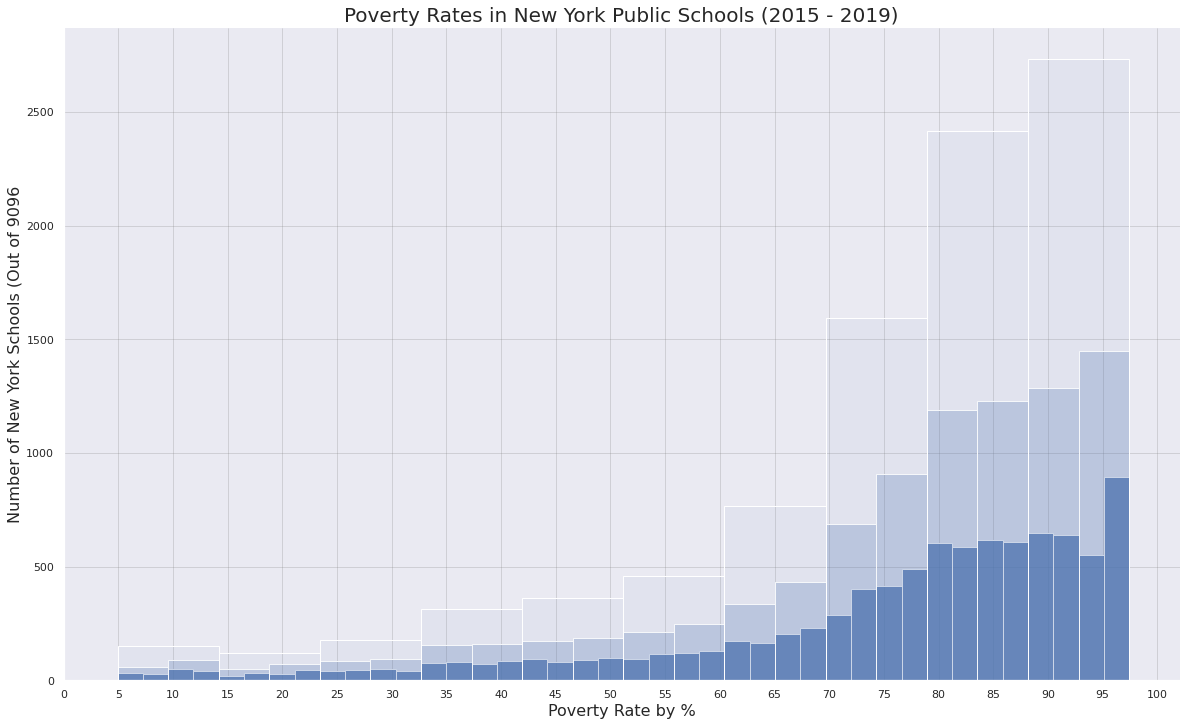

In [ ]:
fig, ax = plt.subplots(1, figsize = (20,12), sharex = True, sharey = True)
sns.set_theme()

sns.histplot(x = df_all_poverty['Adjusted Poverty'], bins = 40)
sns.histplot(x = df_all_poverty['Adjusted Poverty'], alpha = .25, bins = 20)
sns.histplot(x = df_all_poverty['Adjusted Poverty'], alpha = .05, bins = 10)

#Labels and Graphics
ax.set_title(f"Poverty Rates in New York Public Schools ({min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)})", size = 20 )
ax.set_xlabel(f"Poverty Rate by %", size = 16)
ax.set_ylabel(f"Number of New York Schools (Out of {len(df_all_poverty)}", size = 16)
ax.grid()

start, end = ax.get_xlim()
stepsize = 5
ax.xaxis.set_ticks(np.arange(start-.3, end, stepsize))

ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
sns.despine()

*Note:* This histogram is a little deceptive because of the encoding any 'higher than 95' as being 95. Regardless, there are a huge number of schools in the New York City school systems with poverty rates that are at least 95%.

Alpha for Boxplot
ref: https://github.com/mwaskom/seaborn/issues/979

New York High Schools show an exponential increasing trend- the number of schools that have higher poverty increases in likelihood the higher the poverty rate increases. In New York High Schools, poverty is very high above 90%.

### Plotting High School Poverty Rates by Year

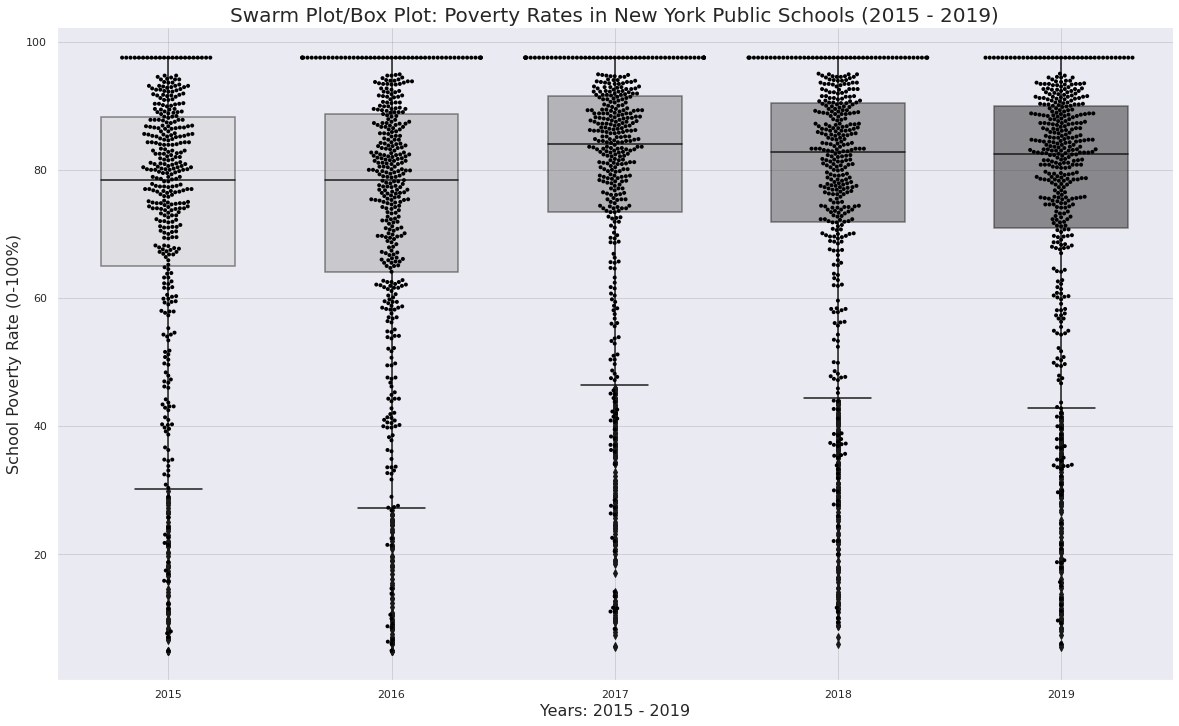

In [ ]:
#Set sample size for data (Currently set at half)
sample_size = int(round(len(df_all_poverty) / 2, 0))
sns.set_theme()

df_sample = df_all_poverty.sample(sample_size)

#Plot the data
fig, ax = plt.subplots(1, figsize = (20,12), sharex = True, sharey = True)

sns.swarmplot(x = 'Year_start', 
              y = 'Adjusted Poverty',
              data = df_all_poverty.sample(2000), 
              size = 4,
              alpha = 1,
              color = 'black',)

sns.boxplot(x = 'Year_start', 
            y = 'Adjusted Poverty',
            data = df_all_poverty,
            color = 'black',
            palette = 'gray_r',
            width = .6,
            boxprops=dict(alpha=.5))

#Labels and Graphics
ax.set_title(f"Swarm Plot/Box Plot: Poverty Rates in New York Public Schools ({min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)})", size = 20 )
ax.set_xlabel(f"Years: {min(df_all_poverty.Year_start)} - {max(df_all_poverty.Year_start)}", size = 16)
ax.set_ylabel("School Poverty Rate (0-100%)", size = 16)
ax.grid()

ax.grid(color='gray', alpha = .5, linestyle='-', linewidth=.5)
sns.despine()

In [ ]:
df_all_poverty[['Year_start','Adjusted Poverty']].groupby('Year_start').agg(['mean','median', np.var, np.std, min,max])

Adjusted Poverty                                         
                       mean median         var        std  min   max
Year_start                                                          
2015              73.820472   78.4  392.494246  19.811468  5.0  97.5
2016              73.498384   78.4  418.022456  20.445597  5.0  97.5
2017              78.347163   84.1  373.560421  19.327711  5.6  97.5
2018              77.318478   82.8  367.414003  19.168046  6.0  97.5
2019              76.629872   82.5  377.371276  19.426046  5.6  97.5

## Note on Adjusted Poverty Rate:
There is a noticeable poverty rate spike in 2017, where median adjusted poverty rate rose from 78.4% - 84.1%, and mean adjusted poverty rate rose from 73.2% to 78%. Additionally, the standard deviation was similar, so this appears to be a significant change.

#Focus on New York Public High Schools
One of the issues with the data in the dataset for schools is that New York's schools are not coded by type. I've chosen to look at four different datasets of the Public High Schools, to specifically focus on how poverty rates are, and how they may have changed. 

Other Predictor

In [ ]:
all_dfs.head()

,DBN,School Name,School Type,Enrollment,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,Effective School Leadership - Percent Positive,Strong Family-Community Ties - Percent Positive,Trust - Percent Positive,Quality Review - How interesting and challenging is the curriculum?,Quality Review - How effective is the teaching and learning?,Quality Review - How well does the school assess what students are learning?,Quality Review - How well do teachers work with each other?,Quality Review - How clearly are high expectations communicated to students and staff?,Quality Review - Dates of Review,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Percent English Language Learners,Percent Students with Disabilities,Percent Self-Contained,Economic Need Index,Percent in Temp Housing - 4yr,Percent HRA Eligible,Percent Asian,Percent Black,Percent Hispanic,Percent White,Years of principal experience at this school,Percent of teachers with 3 or more years of experience,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,Percent Overage/Undercredited,Percent in Temp Housing,Quality Review - How safe and inclusive is the school while supporting social-emotional growth?,Quality Review - How well does the school allocate and manage resources?,"Quality Review - How well does the school identify, track, and meet its goals?",Quality Review - How thoughtful is the school’s approach to teacher development and evaluation?,Quality Review - How well are school decisions evaluated and adjusted?,Percent Overage/ Undercredited
0,01M292,Henry Street School for International Studies,High School,255,Not Meeting Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Meeting Target,Meeting Target,0.72,0.77,0.77,0.72,0.76,0.87,Developing,Developing,Developing,Developing,Developing,2015-05-01 00:00:00,2.18,2.06,0.127,0.298,0.015,0.832,0.190,0.663,0.132,0.244,0.566,0.039,3.0,0.667,0.766,0.568,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M448,University Neighborhood High School,High School,304,Meeting Target,Meeting Target,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,0.85,0.95,0.87,0.93,0.79,0.95,Well Developed,Proficient,Proficient,Well Developed,Proficient,2015-04-21 00:00:00,2.27,2.37,0.194,0.220,0.003,0.812,0.263,0.599,0.299,0.250,0.411,0.033,5.5,0.696,0.880,0.347,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M450,East Side Community School,High School,666,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,Exceeding Target,0.92,0.95,0.92,0.96,0.88,0.95,Well Developed,Proficient,Well Developed,Well Developed,Well Developed,2015-05-26 00:00:00,2.66,2.63,0.018,0.234,0.000,0.610,0.057,0.447,0.094,0.221,0.579,0.083,13.8,0.784,0.938,0.165,0.961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M509,Marta Valle High School,High School,363,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,Approaching Target,0.86,0.76,0.81,0.69,0.70,0.82,Developing,Developing,Developing,Developing,Proficient,2015-01-08 00:00:00,2.28,2.09,0.091,0.284,0.146,0.767,0.149,0.595,0.058,0.399,0.512,0.025,1.9,0.690,0.768,0.647,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M539,"New Explorations into Science, Technology and ...",High School,1735,Exceeding Target,Approaching Target,Meeting Target,Not Meeting Target,Approaching Target,Not Meeting Target,Exceeding Target,0.81,0.73,0.85,0.55,0.81,0.74,Well Developed,Well Developed,Well Developed,Well Developed,Proficient,2015-02-05 00:00:00,3.50,3.53,0.002,0.043,0.000,0.257,0.029,0.260,0.385,0.133,0.180,0.286,9.0,0.602,0.952,0.130,0.967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_df_corr = all_dfs.corr()
all_df_corr['Economic Need Index'].sort_values(ascending = False)

Economic Need Index                                       1.000000
Percent HRA Eligible                                      0.876515
Percent in Temp Housing                                   0.723811
Percent Overage/ Undercredited                            0.601797
Percent Hispanic                                          0.593815
Percent in Temp Housing - 4yr                             0.590982
Percent of Students Chronically Absent                    0.568288
Percent Overage/Undercredited                             0.558275
Percent English Language Learners                         0.468977
Percent Students with Disabilities                        0.332945
Percent Self-Contained                                    0.097986
Strong Family-Community Ties - Percent Positive           0.073404
Percent Black                                             0.027463
Trust - Percent Positive                                  0.001180
Effective School Leadership - Percent Positive           -0.01

What's troubling here is how correlated 'Percent Hispanic' is to the economic need index. It is interesting, and troubling, to note that the more hispanic the school, the higher the need becomes, but this correlation is even stronger than correlation between need and those in temporary housing. No other group trends so strongly; schools with higher African American populations correlate weakly. 

In looking at simple racial disparities in terms of economic need, schools with high caucasian populations appear to be much lower on the Economic Need Index, with a somewhat-strong negative -.657 correlation.

More positive is that as economic need rises, there are only small negative correlations in Effective School Leadership, Teacher Attendance, Supportive Enviromnents, and Rigor of instruction. This suggests that students' education is not largely negatively impacted, regardless of economic level. 

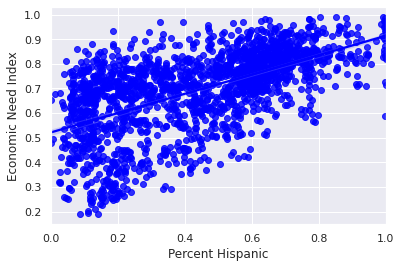

In [ ]:
#sns.scatterplot(x = all_dfs['Percent Hispanic'], y = all_dfs['Economic Need Index'])
sns.regplot(x = all_dfs['Percent Hispanic'], y = all_dfs['Economic Need Index'], color = 'blue')